In [206]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.collections as mcol
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib.lines import Line2D

In [207]:
df = pd.read_csv(r'/Users/alex/Desktop/ProjectFinalAnswers/data/owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295836,ZWE,Africa,Zimbabwe,2023-03-12,264385.0,13.0,16.429,5672.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
295837,ZWE,Africa,Zimbabwe,2023-03-13,264391.0,6.0,16.429,5672.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
295838,ZWE,Africa,Zimbabwe,2023-03-14,264391.0,0.0,14.857,5672.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
295839,ZWE,Africa,Zimbabwe,2023-03-15,264391.0,0.0,10.857,5672.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [208]:
column_headers = list(df.columns.values)
print("The Column Header :", column_headers)

The Column Header : ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_p

In [209]:
df2 = pd.DataFrame([df.iso_code,df.location,df.date,df.total_cases_per_million,df.icu_patients_per_million,df.total_vaccinations,df.population]).transpose()
df2

,iso_code,location,date,total_cases_per_million,icu_patients_per_million,total_vaccinations,population
0,AFG,Afghanistan,2020-01-03,NaN,NaN,NaN,41128772.0
1,AFG,Afghanistan,2020-01-04,NaN,NaN,NaN,41128772.0
2,AFG,Afghanistan,2020-01-05,NaN,NaN,NaN,41128772.0
3,AFG,Afghanistan,2020-01-06,NaN,NaN,NaN,41128772.0
4,AFG,Afghanistan,2020-01-07,NaN,NaN,NaN,41128772.0
...,...,...,...,...,...,...,...
295836,ZWE,Zimbabwe,2023-03-12,16199.526,NaN,NaN,16320539.0
295837,ZWE,Zimbabwe,2023-03-13,16199.894,NaN,NaN,16320539.0
295838,ZWE,Zimbabwe,2023-03-14,16199.894,NaN,NaN,16320539.0
295839,ZWE,Zimbabwe,2023-03-15,16199.894,NaN,NaN,16320539.0


In [210]:
df2[['date']]= df2[['date']].apply(pd.to_datetime)
df2['days_since']=df2.apply(lambda row: row.date- datetime.strptime('2020-12-09','%Y-%m-%d'),axis =1)
df2['days_since']=df2['days_since'].dt.days
print(df2.dtypes)
df2

iso_code                            object
location                            object
date                        datetime64[ns]
total_cases_per_million             object
icu_patients_per_million            object
total_vaccinations                  object
population                          object
days_since                           int64
dtype: object


,iso_code,location,date,total_cases_per_million,icu_patients_per_million,total_vaccinations,population,days_since
0,AFG,Afghanistan,2020-01-03,NaN,NaN,NaN,41128772.0,-341
1,AFG,Afghanistan,2020-01-04,NaN,NaN,NaN,41128772.0,-340
2,AFG,Afghanistan,2020-01-05,NaN,NaN,NaN,41128772.0,-339
3,AFG,Afghanistan,2020-01-06,NaN,NaN,NaN,41128772.0,-338
4,AFG,Afghanistan,2020-01-07,NaN,NaN,NaN,41128772.0,-337
...,...,...,...,...,...,...,...,...
295836,ZWE,Zimbabwe,2023-03-12,16199.526,NaN,NaN,16320539.0,823
295837,ZWE,Zimbabwe,2023-03-13,16199.894,NaN,NaN,16320539.0,824
295838,ZWE,Zimbabwe,2023-03-14,16199.894,NaN,NaN,16320539.0,825
295839,ZWE,Zimbabwe,2023-03-15,16199.894,NaN,NaN,16320539.0,826


In [211]:
df2['total_vaccinations_per_million'] = df2.apply(lambda row: (row.total_vaccinations/row.population)*1000000, axis =1)
df2 = df2.loc[(df2['days_since'] >349)]
df2

,iso_code,location,date,total_cases_per_million,icu_patients_per_million,total_vaccinations,population,days_since,total_vaccinations_per_million
691,AFG,Afghanistan,2021-11-24,3817.644,NaN,NaN,41128772.0,350,NaN
692,AFG,Afghanistan,2021-11-25,3818.057,NaN,NaN,41128772.0,351,NaN
693,AFG,Afghanistan,2021-11-26,3820.78,NaN,NaN,41128772.0,352,NaN
694,AFG,Afghanistan,2021-11-27,3821.437,NaN,NaN,41128772.0,353,NaN
695,AFG,Afghanistan,2021-11-28,3821.899,NaN,NaN,41128772.0,354,NaN
...,...,...,...,...,...,...,...,...,...
295836,ZWE,Zimbabwe,2023-03-12,16199.526,NaN,NaN,16320539.0,823,NaN
295837,ZWE,Zimbabwe,2023-03-13,16199.894,NaN,NaN,16320539.0,824,NaN
295838,ZWE,Zimbabwe,2023-03-14,16199.894,NaN,NaN,16320539.0,825,NaN
295839,ZWE,Zimbabwe,2023-03-15,16199.894,NaN,NaN,16320539.0,826,NaN


In [212]:
df2 = pd.DataFrame([df2.iso_code,df2.location, df2.days_since,df2.total_cases_per_million,df2.total_vaccinations_per_million,df2.icu_patients_per_million]).transpose()
df2

,iso_code,location,days_since,total_cases_per_million,total_vaccinations_per_million,icu_patients_per_million
691,AFG,Afghanistan,350,3817.644,NaN,NaN
692,AFG,Afghanistan,351,3818.057,NaN,NaN
693,AFG,Afghanistan,352,3820.78,NaN,NaN
694,AFG,Afghanistan,353,3821.437,NaN,NaN
695,AFG,Afghanistan,354,3821.899,NaN,NaN
...,...,...,...,...,...,...
295836,ZWE,Zimbabwe,823,16199.526,NaN,NaN
295837,ZWE,Zimbabwe,824,16199.894,NaN,NaN
295838,ZWE,Zimbabwe,825,16199.894,NaN,NaN
295839,ZWE,Zimbabwe,826,16199.894,NaN,NaN


In [213]:
df3 = df2.loc[df2['location']== 'United States']
df4 = df2.loc[df2['location']== 'Chile']
df5 = df2.loc[df2['location']== 'South Korea']
df6 = df2.loc[df2['location']== 'France']
df3

,iso_code,location,days_since,total_cases_per_million,total_vaccinations_per_million,icu_patients_per_million
279089,USA,United States,350,140749.934,1384847.702912,36.797
279090,USA,United States,351,141048.69,1384934.595851,36.865
279091,USA,United States,352,141363.612,1388541.884035,37.406
279092,USA,United States,353,141578.585,1391210.808284,37.982
279093,USA,United States,354,141820.232,1392977.996952,38.739
...,...,...,...,...,...,...
279565,USA,United States,826,302752.161,NaN,6.82
279566,USA,United States,827,302752.161,NaN,6.548
279567,USA,United States,828,NaN,NaN,6.243
279568,USA,United States,829,NaN,NaN,6.107


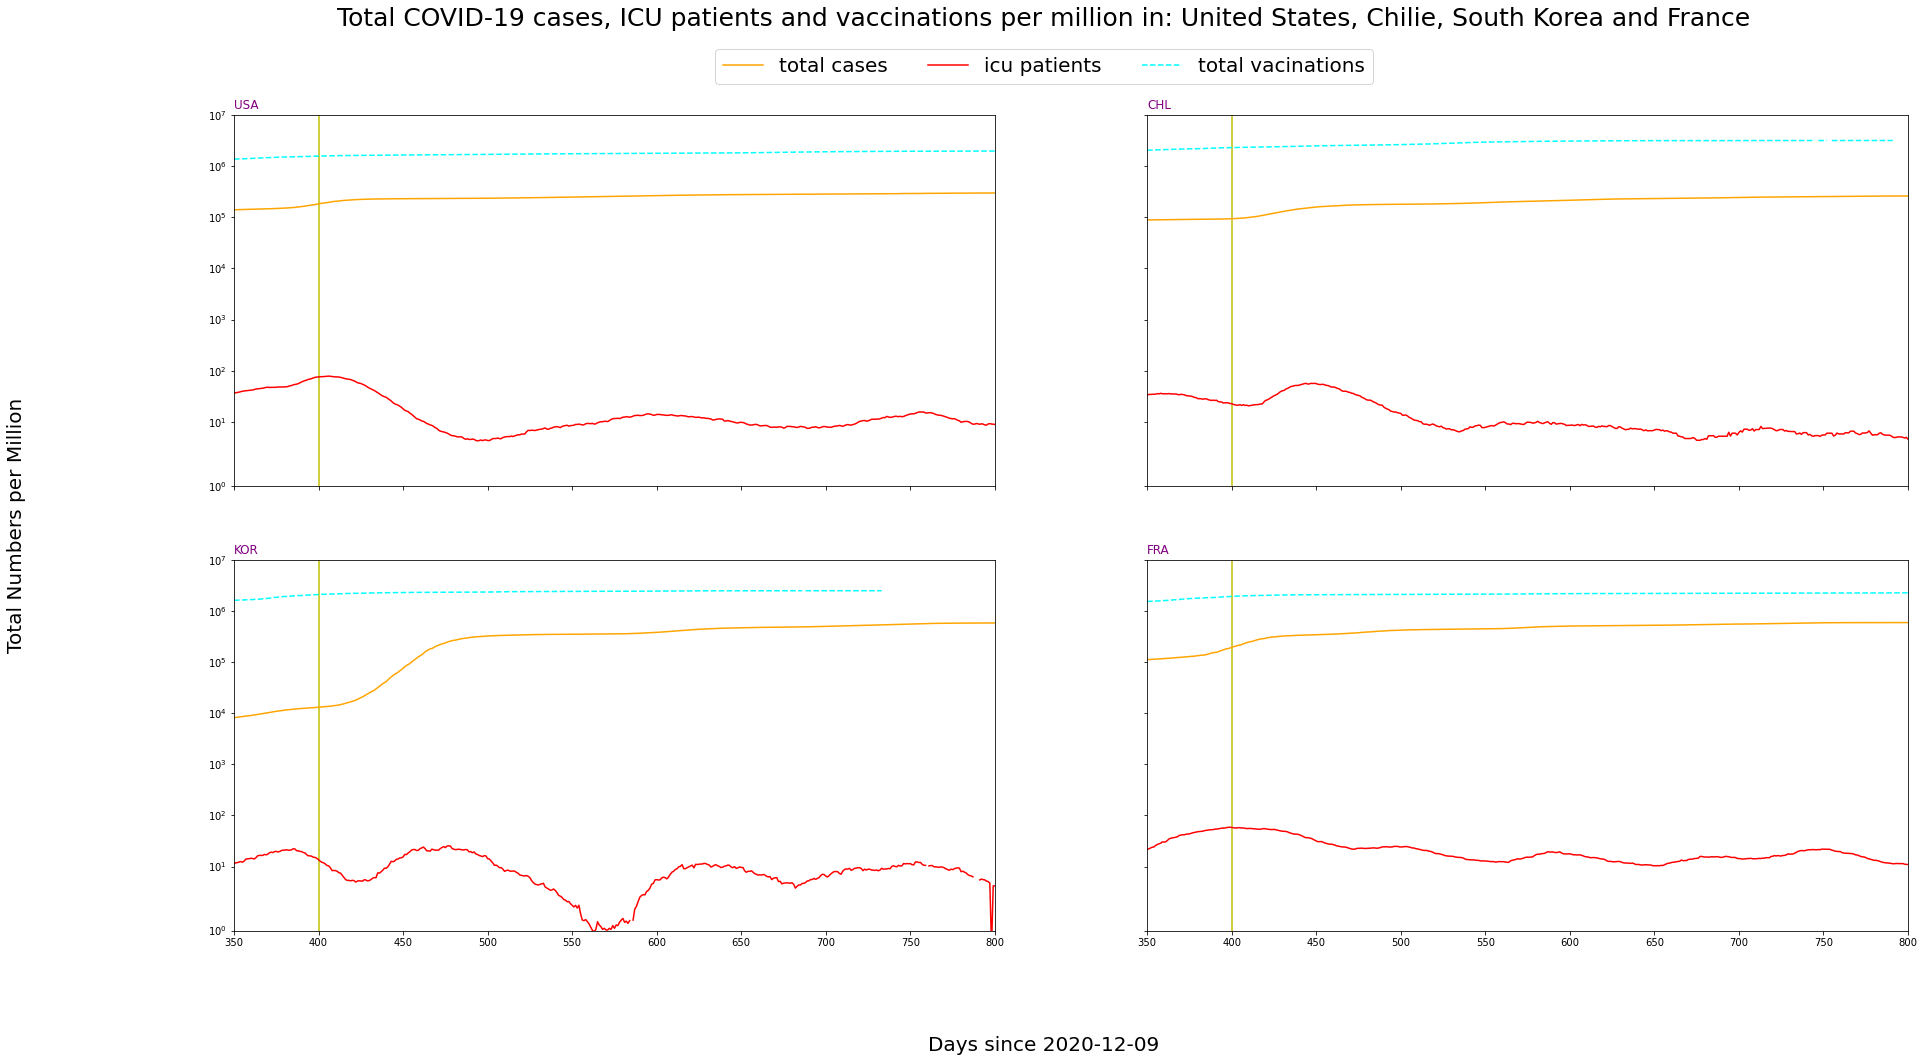

In [265]:

fig,axs = plt.subplots(2,2, sharex='all', sharey='all', figsize=(30, 15))
fig.suptitle('Total COVID-19 cases, ICU patients and vaccinations per million in: United States, Chilie, South Korea and France', size = 25)
fig.supxlabel('Days since 2020-12-09',size = 20)
fig.supylabel('Total Numbers per Million',size =20)

plt.xlim(350,800)
plt.xticks(np.arange(350, 801, 50))
plt.ylim(1,10000000)
plt.yscale('symlog')

x = df3.days_since
cases= df3.total_cases_per_million	
patients=df3.icu_patients_per_million
vaccine = df3.total_vaccinations_per_million
axs[0,0].plot(x,df3.total_cases_per_million,color = "orange",label = "total cases")
axs[0,0].plot(x,df3.icu_patients_per_million,color = "red",label = "icu patients")
axs[0,0].plot(x,df3.total_vaccinations_per_million,'--',color = "cyan",label="total vacinations")
axs[0,0].set_title('USA', color = 'purple',loc = 'left')


plt.plot()

x = df4.days_since
y1= df4.total_cases_per_million	
y2=df4.icu_patients_per_million
y3 = df4.total_vaccinations_per_million
axs[0,1].plot(x,df4.total_cases_per_million,color = "orange",label = "total cases")
axs[0,1].plot(x,df4.icu_patients_per_million,color = "red",label = "icu patients")
axs[0,1].plot(x,df4.total_vaccinations_per_million,'--',color = "cyan",label="total vacinations")
axs[0,1].set_title('CHL', color = 'purple',loc = 'left')


plt.plot()

x = df5.days_since
cases= df5.total_cases_per_million	
patients=df5.icu_patients_per_million
vaccine= df5.total_vaccinations_per_million
axs[1,0].plot(x,df5.total_cases_per_million,color = "orange",label = "total cases")
axs[1,0].plot(x,df5.icu_patients_per_million,color = "red",label = "icu patients")
axs[1,0].plot(x,df5.total_vaccinations_per_million,'--',color = "cyan",label="total vacinations")
axs[1,0].set_title('KOR', color = 'purple',loc = 'left')

plt.plot()

x = df6.days_since
cases= df6.total_cases_per_million	
patients=df6.icu_patients_per_million
vaccine = df6.total_vaccinations_per_million
axs[1,1].plot(x,df6.total_cases_per_million,color = "orange",label = "total cases")
axs[1,1].plot(x,df6.icu_patients_per_million,color = "red",label = "icu patients")
axs[1,1].plot(x,df6.total_vaccinations_per_million,'--',color = "cyan",label="total vacinations")
axs[1,1].set_title('FRA', color = 'purple',loc = 'left')


plt.plot()
handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc="center", bbox_to_anchor=(0.5,0.925),prop = { "size": 20 },frameon=True,ncol = 5)




plt.show()

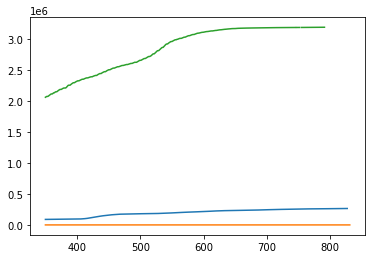

In [215]:
x = df4.days_since
y1= df4.total_cases_per_million	
y2=df4.icu_patients_per_million
y3 = df4.total_vaccinations_per_million
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)





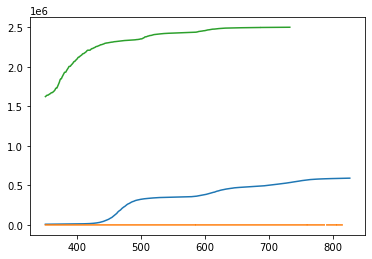

In [216]:
x = df5.days_since
y1= df5.total_cases_per_million	
y2=df5.icu_patients_per_million
y3 = df5.total_vaccinations_per_million
plt.plot(x,y1 )
plt.plot(x,y2)
plt.plot(x,y3)
plt.show()

In [217]:
df6 = df2.loc[df2['location']== 'France']
df6

,iso_code,location,days_since,total_cases_per_million,total_vaccinations_per_million,icu_patients_per_million
89512,FRA,France,350,111708.713,1540171.619011,21.869
89513,FRA,France,351,112210.844,1545060.858537,22.105
89514,FRA,France,352,112726.421,1552262.280094,23.049
89515,FRA,France,353,113256.403,1556515.579609,23.845
89516,FRA,France,354,113831.043,1557559.981125,24.066
...,...,...,...,...,...,...
89989,FRA,France,827,597064.965,2276290.224588,11.045
89990,FRA,France,828,NaN,2276337.132998,11.134
89991,FRA,France,829,NaN,2276353.088641,11.089
89992,FRA,France,830,NaN,2276354.150384,11.119


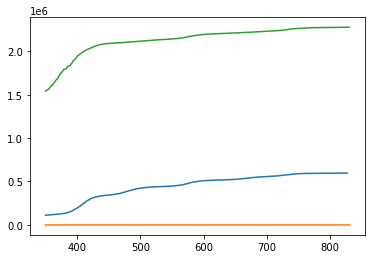

In [218]:
x = df6.days_since
y1= df6.total_cases_per_million	
y2=df6.icu_patients_per_million
y3 = df6.total_vaccinations_per_million

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.show()



/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


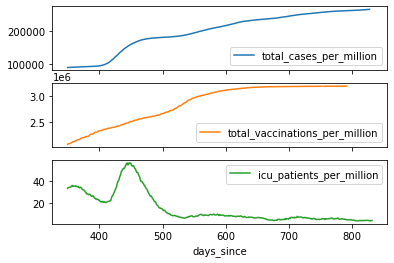

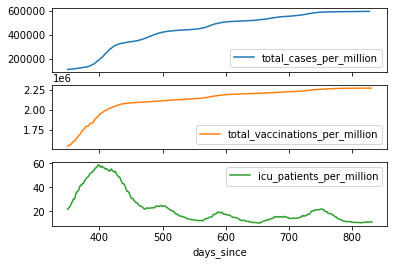

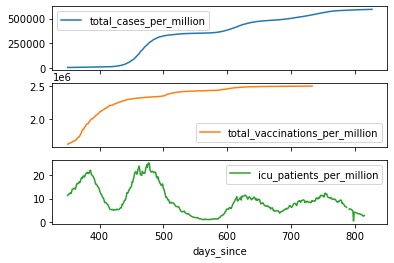

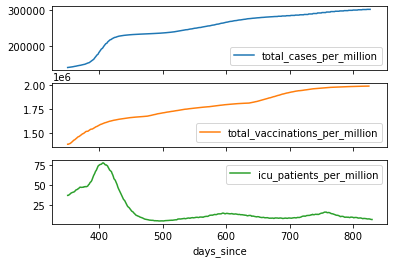

In [219]:

df8 = pd.concat([df6,df5,df4,df3])
df7 = df8
df8.set_index('days_since',inplace = True)

df8.groupby('iso_code').plot(subplots=True)
fig.suptitle('Total COVID-19 cases, ICU patients and vaccinations per million in United States, Chilie, South Korea and France')
plt.show()

In [220]:
df8

,iso_code,location,total_cases_per_million,total_vaccinations_per_million,icu_patients_per_million
days_since,,,,,
350,FRA,France,111708.713,1540171.619011,21.869
351,FRA,France,112210.844,1545060.858537,22.105
352,FRA,France,112726.421,1552262.280094,23.049
353,FRA,France,113256.403,1556515.579609,23.845
354,FRA,France,113831.043,1557559.981125,24.066
...,...,...,...,...,...
826,USA,United States,302752.161,NaN,6.82
827,USA,United States,302752.161,NaN,6.548
828,USA,United States,NaN,NaN,6.243


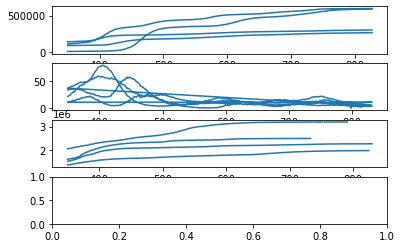

In [221]:

x = df7.index
y1= df7.total_cases_per_million	
y2=df7.icu_patients_per_million
y3 = df7.total_vaccinations_per_million
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4)

ax1.plot(x,y1)
ax2.plot(x,y2)
ax3.plot(x,y3)

plt.show()